In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# # Create Python package from Rust code
# maturin develop --release

In [3]:
import src.benchmark_utils as benchmark_utils

# Define a causal structure

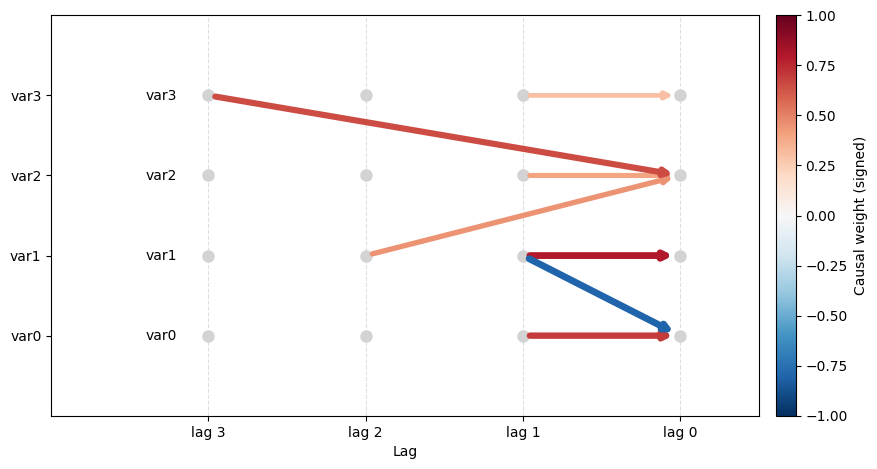

In [4]:
n_vars = 4
var_names = [f"var{i}" for i in range(n_vars)]
causal_edges = [
    ("var0", "var0", 1, 0.7),
    ("var1", "var1", 1, 0.8),
    ("var2", "var2", 1, 0.4),
    ("var3", "var3", 1, 0.3),
    ("var1", "var0", 1, -0.8),
    ("var1", "var2", 2, 0.45),
    ("var3", "var2", 3, 0.65),
]


causal_structure = benchmark_utils.CausalStructure(causal_edges, var_names)
causal_structure.plot()

# Define base parameters for the PCMCI algorithm

In [25]:
base_params = {
    "n_time": 5000,
    "n_vars": n_vars+1,  # +1 for noise variable
    "max_lag": 3,
    "alpha": 0.05,
    "cond_size": 3,
    "subsets": 1,
}

bench = benchmark_utils.BenchmarkParam(
    causal_structure=causal_structure,
    noise_level=0.1
)

# Execute Tigramite and Rust versions of PCMCI with the base parameters and compare causal structures identified

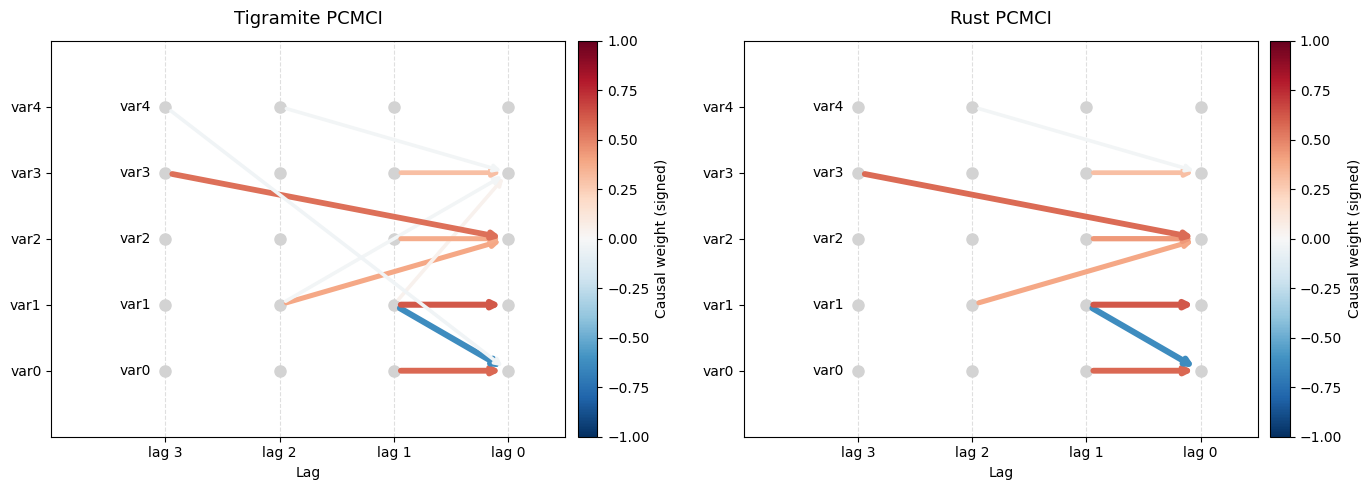

In [26]:
bench.plot_causal_structures(base_params)

# Benchmark the PCMCI implementations varying one parameter (similarity measures and execution time)

### n_time

In [7]:
bench.run(
    param_name="n_time",
    param_values=[5000, 10000, 20000, 40000, 80000, 120000],
    fixed_params=base_params,
    n_runs=2
)

bench.results

,n_time,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,5000,0.526728,0.032682,0.011783,0.999034,0.998674
1,10000,0.610537,0.102509,0.000613,0.999998,0.999997
2,20000,1.483898,0.200071,0.063568,0.999964,0.999961
3,40000,2.201972,0.321815,0.055750,0.999984,0.999981
4,80000,4.482391,0.657875,0.116822,0.999975,0.999960
5,120000,6.488296,0.882807,0.218063,0.999982,0.999980


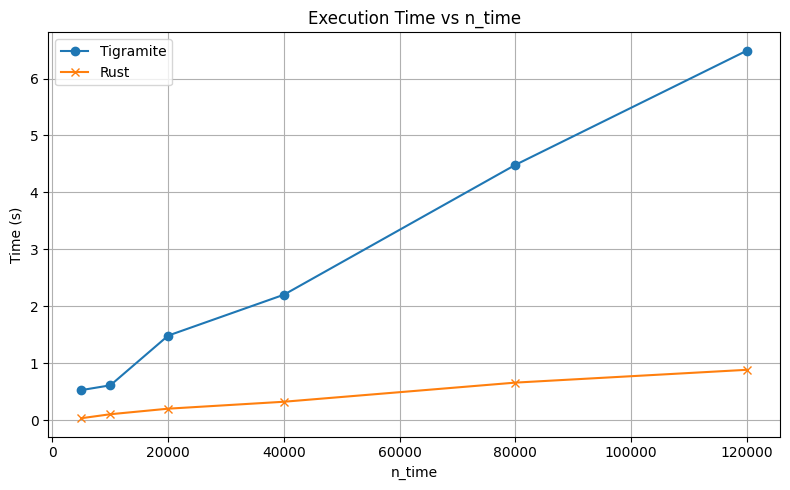

In [8]:
bench.plot_exec_time()

### n_vars

In [9]:
bench.run(
    param_name="n_vars",
    param_values=[4, 10, 20, 30],
    fixed_params=base_params,
    n_runs=1
)

bench.results

,n_vars,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,4,0.349630,0.038034,0.117254,0.999943,0.999927
1,10,1.859282,0.198908,0.038607,0.999933,0.999941
2,20,8.407125,0.316545,0.020740,0.999267,0.999240
3,30,25.659183,0.910630,0.030816,0.999534,0.999531


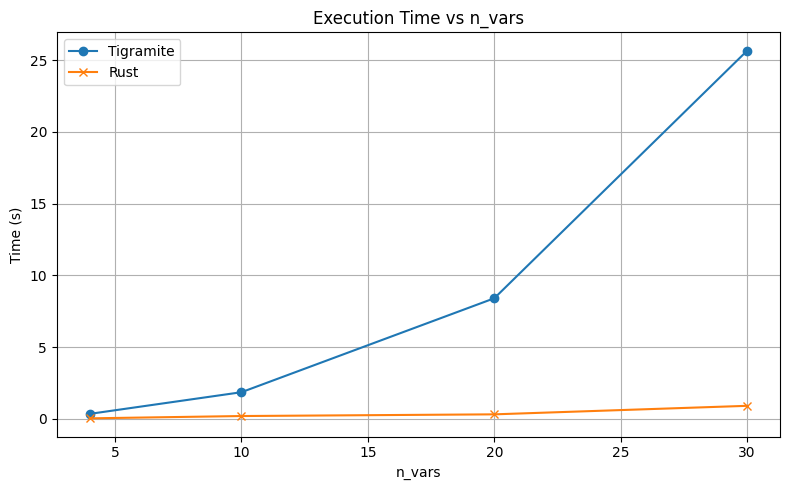

In [10]:
bench.plot_exec_time()

### max_lag

In [21]:
bench.run(
    param_name="max_lag",
    param_values=[1, 3, 6, 9],
    fixed_params=base_params,
    n_runs=2
)

bench.results

,max_lag,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,1,0.654678,0.026653,0.399851,0.974902,0.970331
1,3,0.769106,0.031917,0.011783,0.999034,0.998674
2,6,1.029270,0.185198,0.272965,0.908247,0.909303
3,9,1.617239,0.307294,0.210270,0.999681,0.999591


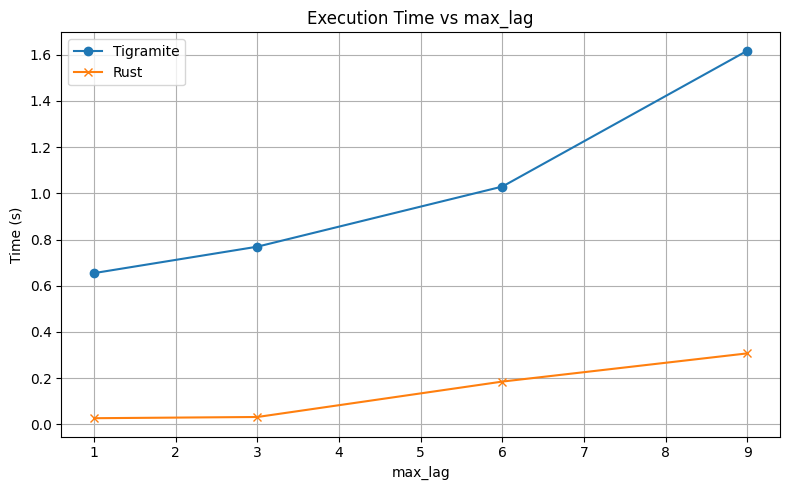

In [22]:
bench.plot_exec_time()